<a href="https://colab.research.google.com/github/ManjuKonatala/FML/blob/main/Univariate_on_Company_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Importing the required libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

2.Getting the dataset :

In [ ]:
dt=pd.read_csv("/Company_data.csv")

3.EDA on company dataset :

In [ ]:
dt.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
dt.shape

(200, 4)

In [ ]:
dt.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
dt.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Correlation to get input feature :

In [ ]:
dt.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [ ]:
X=dt.drop('Sales',axis=1).values
y=dt['Sales'].values


Taking single input feature

In [ ]:
X_TV=X[:,0]


In [ ]:
type(X_TV),type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_TV.shape , y.shape

((200,), (200,))

In [ ]:
X_TV=X_TV.reshape(-1,1)
y=y.reshape(-1,1)

In [ ]:
X_TV.shape , y.shape

((200, 1), (200, 1))

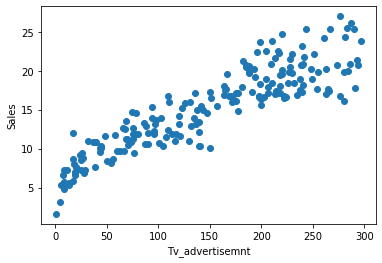

In [ ]:
plt.scatter(X_TV,y)
plt.xlabel('Tv_advertisemnt')
plt.ylabel('Sales')
plt.show()

4.Splitting the training and testing data :  

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_TV,y,test_size=0.30,random_state=0)

In [ ]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

5.Training the model :

In [ ]:
#model on training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

6.Performance based on training data :

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_train)

print(f'MAE = {mean_absolute_error(y_train, y_pred)}')
print(f'MSE = {mean_squared_error(y_train, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred))}')
print(f'R_2 = {r2_score(y_train, y_pred)}')

MAE = 1.8201990405939845
MSE = 5.084912326550823
RMSE = 2.2549750168351808
R_2 = 0.805675464591566


In [ ]:
prediction_space = np.linspace(min(X_train), max(X_train)).reshape(-1,1)

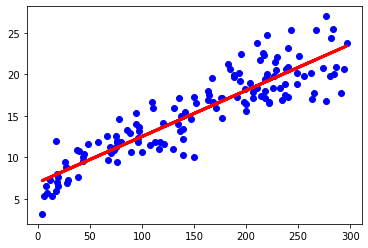

In [ ]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='red', linewidth=3)
plt.show()

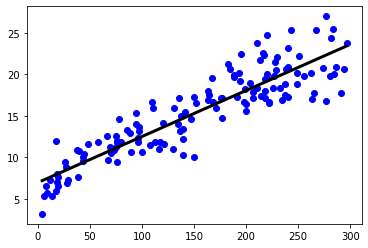

In [ ]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

7.Performance based on test data :

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_test)

print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R_2 = {r2_score(y_test, y_pred)}')

MAE = 1.854826452591508
MSE = 5.527684230698508
RMSE = 2.351102769063596
R_2 = 0.8164070206173365


In [ ]:
prediction_space = np.linspace(min(X_test), max(X_test)).reshape(-1,1)

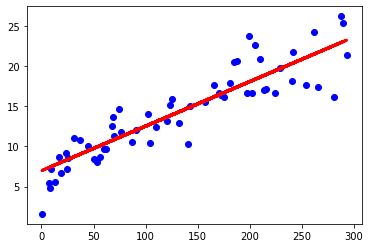

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, reg.predict(X_test), color='red', linewidth=3)
plt.show()

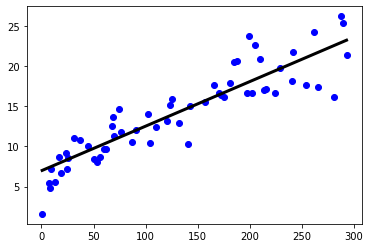

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()